<a href="https://colab.research.google.com/github/kenanmorani/Images_Preprocessing/blob/main/Region_Based_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation Methods Comparison
* This notebook tests three different image segmentation methods; Thresholding, Edge-Based, and Region-Based.
* The image is a CT scan slice taken from COV-19-CT database.
* Dependencies are: skimage, open-cv, numpy, and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage.io import imread
from skimage.color import rgb2gray
import cv2

from skimage import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the image
image = cv2.imread('/content/drive/MyDrive/Covid_data/Training Set/covid/covid/ct_scan_100/22.jpg')

Text(0.5, 1.0, 'Original Image')

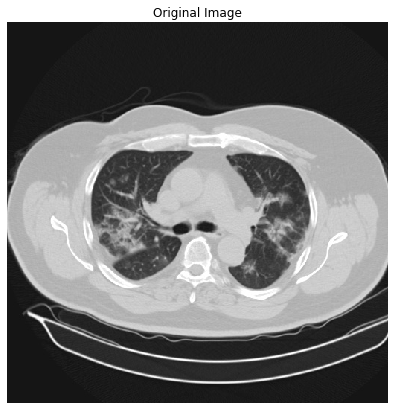

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Original Image')

In [6]:
# Image in grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
from google.colab.patches import cv2_imshow

## Region Based Segmentation

In [8]:
from skimage.filters import sobel

In [9]:
# Blurring the image [img]
img = cv2.GaussianBlur(image, (5, 5), 0)
img = cv2.erode(img, None, iterations=2)
img = cv2.dilate(img, None, iterations=2)
#img = image
elevation_map = sobel(img)

Text(0.5, 1.0, 'elevation_map')

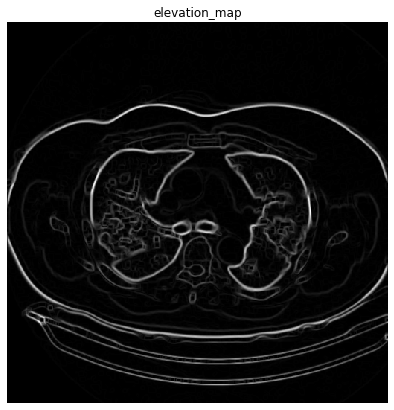

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

In [11]:
# we find markers of the background and the coins based on the extreme parts of the histogram of grey values
markers = np.zeros_like(image)
# Choosing extreme parts of the histogram of grey values
markers[image < 70] = 1
markers[image > 254] = 2

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Text(0.5, 1.0, 'segmentation')

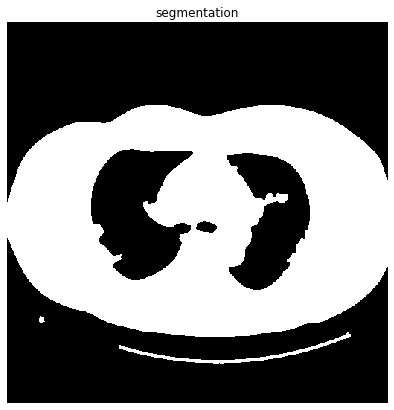

In [12]:
#we use the watershed transform to fill regions of the elevation map starting from the markers determined above:
segmentation = skimage.morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')